In [1]:
import numpy
import skfuzzy
import skfuzzy as fuzz
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from time import time

In [2]:
# Hyper-parameters
randomness_precision = 10000
epsilon = 0.001
m = 2
exponent = (2 / (m - 1))

In [3]:
def parse_headers() -> List[str]:
    with open('data/iris.names') as fp:
        result = [line.split(':')[0] for line in fp.readlines() if "|" not in line and len(line) > 1]
        return result

In [4]:
headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('data/iris.data', names=headers)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
clean_data = data.iloc[:, :-1]
clean_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


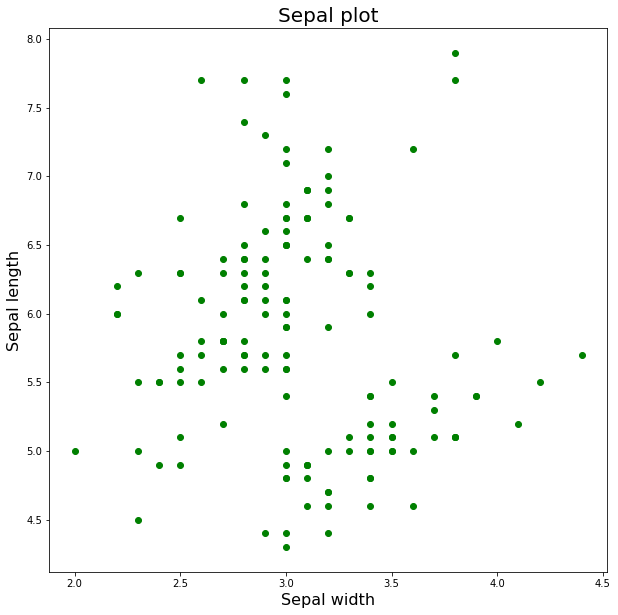

In [6]:
plt.figure(figsize=(10, 10))

plt.title('Sepal plot', fontsize=20)
plt.xlabel('Sepal width', fontsize=16)
plt.ylabel('Sepal length', fontsize=16)

plt.scatter(clean_data['sepal_width'], clean_data['sepal_length'], c='green')

plt.show()

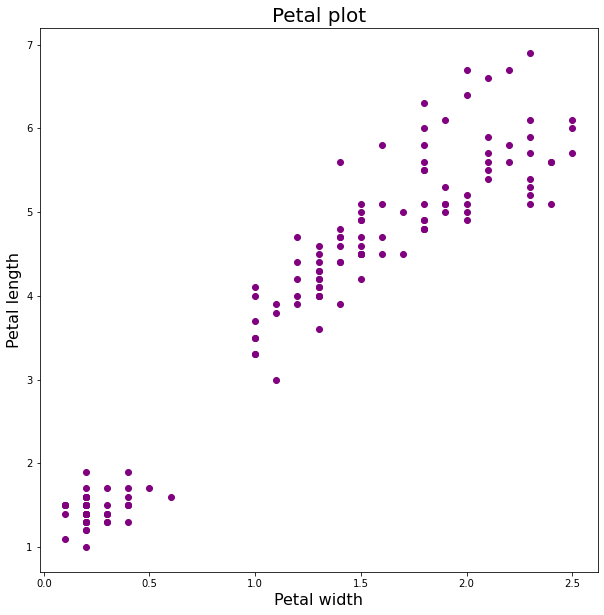

In [7]:
plt.figure(figsize=(10, 10))

plt.title('Petal plot', fontsize=20)
plt.xlabel('Petal width', fontsize=16)
plt.ylabel('Petal length', fontsize=16)

plt.scatter(clean_data['petal_width'], clean_data['petal_length'], c='purple')

plt.show()

In [15]:
centers, matrix, _, _, _, _, _ = fuzz.cmeans(clean_data.T, c=3, m=2, error=0.0001, maxiter=1000)
matrix

array([[2.50054762e-03, 1.58867241e-02, 1.34270384e-02, 2.18500219e-02,
        4.13094590e-03, 4.57789560e-02, 1.40040148e-02, 2.67814627e-04,
        4.69015765e-02, 1.12646829e-02, 2.23167391e-02, 5.33155386e-03,
        1.94177105e-02, 5.12959018e-02, 7.34969563e-02, 1.05699112e-01,
        3.65179234e-02, 2.52437237e-03, 6.62790563e-02, 1.49175194e-02,
        2.17456796e-02, 1.10085720e-02, 2.78571399e-02, 1.42099121e-02,
        2.29917903e-02, 1.75209219e-02, 3.56945642e-03, 4.73981553e-03,
        4.33831905e-03, 1.36966232e-02, 1.40830572e-02, 1.77550931e-02,
        4.22063097e-02, 6.46561092e-02, 1.12646829e-02, 9.91922090e-03,
        2.44900673e-02, 1.12646829e-02, 4.04717867e-02, 1.14078820e-03,
        3.83296479e-03, 1.00884913e-01, 3.18601417e-02, 1.46687416e-02,
        3.88836106e-02, 1.84899582e-02, 1.65475105e-02, 1.72723077e-02,
        1.60791328e-02, 1.81004909e-03, 4.54451373e-01, 7.64250082e-01,
        3.68981045e-01, 8.69928523e-01, 7.58983687e-01, 9.737780

In [23]:
matrix_pd = pd.DataFrame(matrix.T, columns=["Cluster 1", "Cluster 2", "Cluster 3"])
matrix_pd.to_csv("results.csv")

In [9]:
centers_pd = pd.DataFrame(centers, columns=headers[:-1])
centers_pd

,sepal_length,sepal_width,petal_length,petal_width
0,6.775103,3.052426,5.646895,2.053601
1,5.003561,3.403036,1.485001,0.251541
2,5.889187,2.761230,4.364236,1.397437


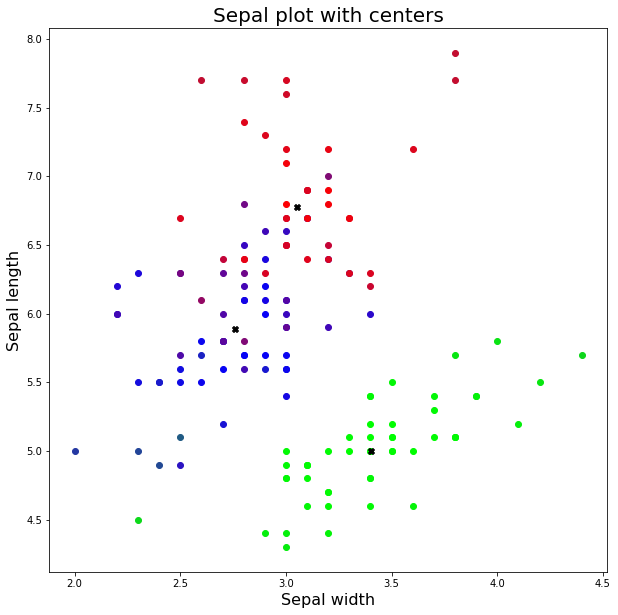

In [10]:
plt.figure(figsize=(10, 10))

plt.title('Sepal plot with centers', fontsize=20)
plt.xlabel('Sepal width', fontsize=16)
plt.ylabel('Sepal length', fontsize=16)


for i in range(len(clean_data['sepal_width'])):
    plt.scatter(clean_data['sepal_width'][i], clean_data['sepal_length'][i], color = matrix[:, i])

plt.scatter(centers_pd['sepal_width'], centers_pd['sepal_length'], marker='X', color='black')
plt.show()

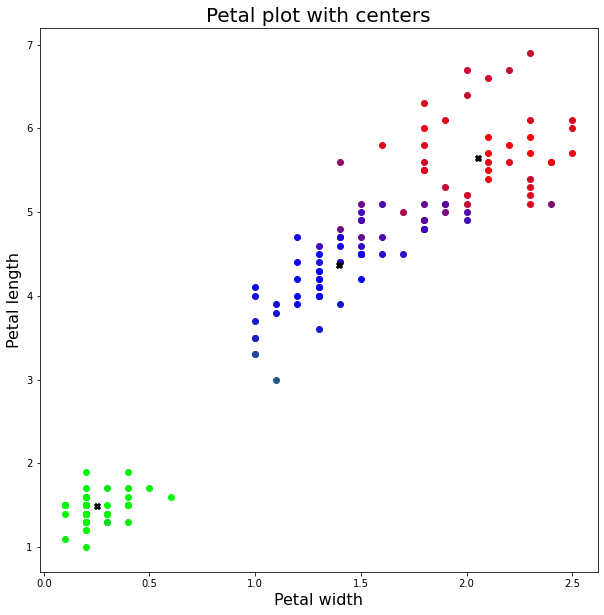

In [11]:
plt.figure(figsize=(10, 10))

plt.title('Petal plot with centers', fontsize=20)
plt.xlabel('Petal width', fontsize=16)
plt.ylabel('Petal length', fontsize=16)


for i in range(len(clean_data['petal_width'])):
    plt.scatter(clean_data['petal_width'][i], clean_data['petal_length'][i], color = matrix[:, i])

plt.scatter(centers_pd['petal_width'], centers_pd['petal_length'], marker='X', color='black')
plt.show()

In [12]:
slope = 1

sepal_width_short = fuzz.gbellmf(x=clean_data["sepal_width"],
                                  a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].min()),
                                  b=slope,
                                  c=centers_pd['sepal_width'].min())

sepal_width_normal = fuzz.gbellmf(x=clean_data["sepal_width"],
                                   a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].min()),
                                   b=slope,
                                   c=centers_pd['sepal_width'].median())
sepal_width_long = fuzz.gbellmf(x=clean_data["sepal_width"],
                                 a=abs(centers_pd['sepal_width'].median() - centers_pd['sepal_width'].max()),
                                 b=slope,
                                 c=centers_pd['sepal_width'].max())

sepal_length_short = fuzz.gbellmf(x=clean_data["sepal_length"],
                                  a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].min()),
                                  b=slope,
                                  c=centers_pd['sepal_length'].min())

sepal_length_normal = fuzz.gbellmf(x=clean_data["sepal_length"],
                                   a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].min()),
                                   b=slope,
                                   c=centers_pd['sepal_length'].median())
sepal_length_long = fuzz.gbellmf(x=clean_data["sepal_length"],
                                 a=abs(centers_pd['sepal_length'].median() - centers_pd['sepal_length'].max()),
                                 b=slope,
                                 c=centers_pd['sepal_length'].max())

petal_length_short = fuzz.gbellmf(x=clean_data["petal_length"],
                                  a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].min()),
                                  b=slope,
                                  c=centers_pd['petal_length'].min())

petal_length_normal = fuzz.gbellmf(x=clean_data["petal_length"],
                                   a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].min()),
                                   b=slope,
                                   c=centers_pd['petal_length'].median())
petal_length_long = fuzz.gbellmf(x=clean_data["petal_length"],
                                 a=abs(centers_pd['petal_length'].median() - centers_pd['petal_length'].max()),
                                 b=slope,
                                 c=centers_pd['petal_length'].max())


petal_width_short = fuzz.gbellmf(x=clean_data["petal_width"],
                                  a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].min()),
                                  b=slope,
                                  c=centers_pd['petal_width'].min())

petal_width_normal = fuzz.gbellmf(x=clean_data["petal_width"],
                                   a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].min()),
                                   b=slope,
                                   c=centers_pd['petal_width'].median())
petal_width_long = fuzz.gbellmf(x=clean_data["petal_width"],
                                 a=abs(centers_pd['petal_width'].median() - centers_pd['petal_width'].max()),
                                 b=slope,
                                 c=centers_pd['petal_width'].max())